<a href="https://colab.research.google.com/github/ABHAY1937/-ML/blob/main/methane_emission_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

df = pd.read_excel("/content/Methane Emissions Changes by EDGAR Decile.xlsx")

df

,ISO3,Country,Province,District,Sector,Model_1,Model_2,Overall
0,CAN,Canada,Saskatchewan,Division No. 1,Oil,Decreasing,Increasing,Mixed
1,CHN,China,Beijing,Beijing,Livestock,Increasing,Increasing,Increasing
2,CHN,China,Chongqing,Chongqing,Soils,Increasing,Increasing,Increasing
3,CHN,China,Henan,Zhengzhou,Coal,Increasing,Increasing,Increasing
4,CHN,China,Shandong,Jining,Coal,Increasing,Increasing,Increasing
5,CHN,China,Shandong,Tai'an,Coal,Increasing,Increasing,Increasing
6,CHN,China,Shanxi,Yangquan,Coal,Increasing,No Trend,Mixed
7,CHN,China,Shanxi,Changzhi,Coal,Increasing,Increasing,Increasing
8,CHN,China,Shanxi,Shuozhou,Coal,Increasing,Increasing,Increasing
9,CHN,China,Shanxi,Linfen,Coal,Increasing,Increasing,Increasing


In [ ]:
df.shape

(26, 8)

In [ ]:
df1=pd.get_dummies(df[["Country","Sector","Overall"]],drop_first=True)

In [ ]:
df2=pd.concat([df,df1],axis=1)

In [ ]:
dfe=df2.drop(["Country","Province","District","Sector","ISO3","Model_1","Model_2","Overall"],axis=1)
dfe

,Country_China,Country_Iran,Country_Iraq,Country_Mexico,Country_Pakistan,Country_Russia,Country_South Africa,Country_United Arab Emirates,Country_United States,Sector_Gas,Sector_Landfills,Sector_Livestock,Sector_Oil,Sector_Soils,Overall_Increasing,Overall_Mixed,Overall_No Trend
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
x=dfe.iloc[:,:-3].values
y=dfe.iloc[:,[-3,-2,-1]].values

In [ ]:
x.ndim

2

In [ ]:
y.ndim

2

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(x_train)
x_train=scalar.fit_transform(x_train)
x_test=scalar.fit_transform(x_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=7)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [ ]:
y_test

array([[1, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [ ]:
#model creation
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(max_depth=2)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=2)

In [ ]:
#predicting model
y_pred=model.predict(x_test)
y_pred

array([[0, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

In [ ]:
#confusion matrix , accuracy score , classificaton report
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay


y_test_1d = np.argmax(y_test, axis=1)
y_pred_1d = np.argmax(y_pred, axis=1)


In [ ]:
result = confusion_matrix(y_test_1d, y_pred_1d)


In [ ]:
score=accuracy_score(y_test_1d,y_pred_1d)
score

1.0

[Text(0.75, 0.9166666666666666, 'x[11] <= 1.237\ngini = 0.358\nsamples = 11\nvalue = [[8, 10]\n[11, 7]\n[17, 1]]'),
 Text(0.625, 0.75, 'x[6] <= 1.94\ngini = 0.37\nsamples = 10\nvalue = [[8, 8]\n[9, 7]\n[15, 1]]'),
 Text(0.5, 0.5833333333333334, 'x[1] <= 1.237\ngini = 0.367\nsamples = 9\nvalue = [[7, 8]\n[9, 6]\n[14, 1]]'),
 Text(0.375, 0.4166666666666667, 'x[12] <= 0.668\ngini = 0.264\nsamples = 7\nvalue = [[3, 8]\n[8, 3]\n[11, 0]]'),
 Text(0.25, 0.25, 'x[13] <= 1.94\ngini = 0.132\nsamples = 6\nvalue = [[1, 8]\n[8, 1]\n[9, 0]]'),
 Text(0.125, 0.08333333333333333, 'gini = 0.146\nsamples = 5\nvalue = [[1, 7]\n[7, 1]\n[8, 0]]'),
 Text(0.375, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [[0, 1]\n[1, 0]\n[1, 0]]'),
 Text(0.5, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [[2, 0]\n[0, 2]\n[2, 0]]'),
 Text(0.625, 0.4166666666666667, 'gini = 0.25\nsamples = 2\nvalue = [[4, 0]\n[1, 3]\n[3, 1]]'),
 Text(0.75, 0.5833333333333334, 'gini = 0.0\nsamples = 1\nvalue = [[1, 0]\n[0, 1]\n[1, 0]]'),
 

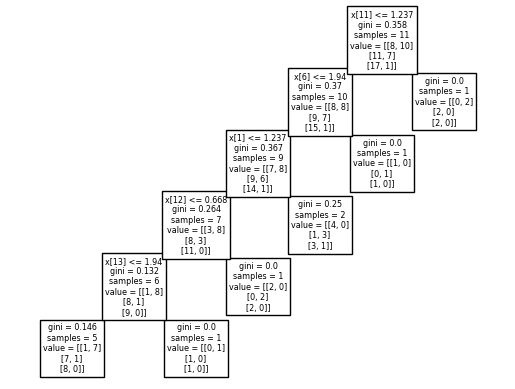

In [ ]:
from sklearn.tree import plot_tree

# create a random forest classifier
clf = RandomForestClassifier(n_estimators=10)
# train the classifier on the dataset
clf.fit(x_train, y_train)

# plot a single decision tree from the random forest
plot_tree(clf.estimators_[0])

In [ ]:
report=classification_report(y_pred_1d,y_test_1d)
report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         8\n\n    accuracy                           1.00         8\n   macro avg       1.00      1.00      1.00         8\nweighted avg       1.00      1.00      1.00         8\n'

In [ ]:
df["Overall"].value_counts()

Increasing    16
Mixed          6
Decreasing     2
No Trend       2
Name: Overall, dtype: int64